In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.shape

(891, 12)

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='count'>

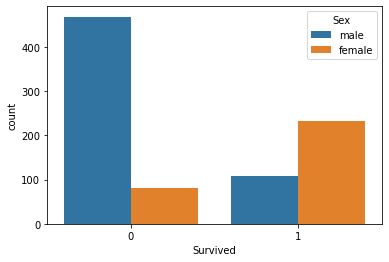

In [9]:
sns.countplot(data=df, x='Survived',hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

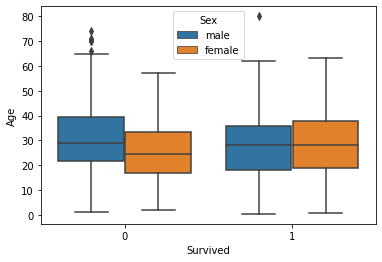

In [10]:
sns.boxplot(data=df,x='Survived',y='Age',hue='Sex')

In [11]:
#remove what we don't need
df=df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

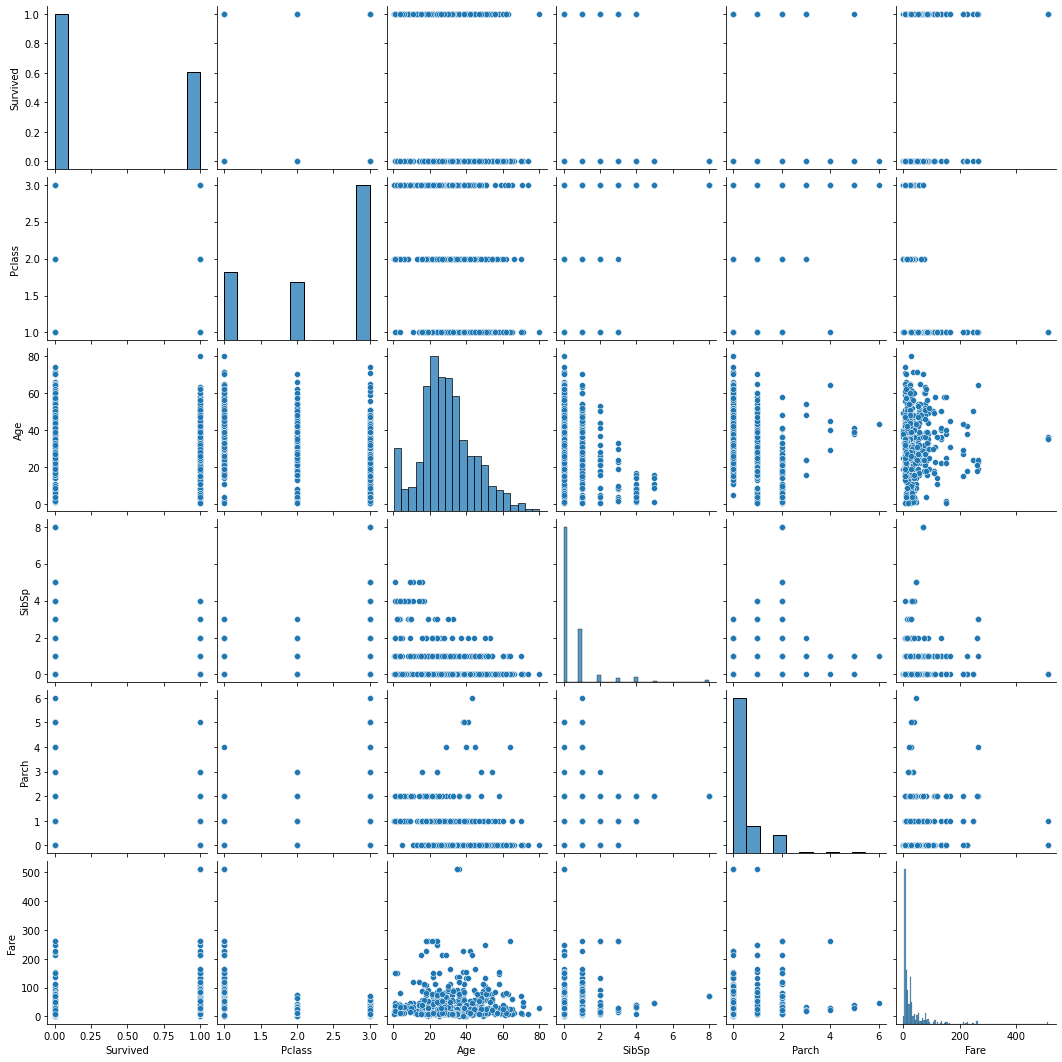

In [12]:
sns.pairplot(df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

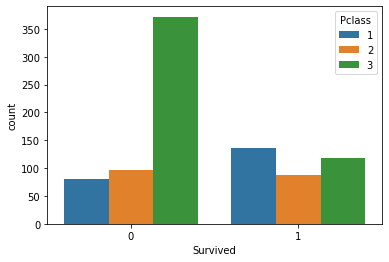

In [13]:
sns.countplot(data=df,x='Survived',hue='Pclass')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

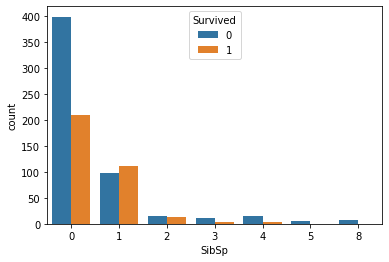

In [14]:
sns.countplot(data=df, x='SibSp',hue='Survived')

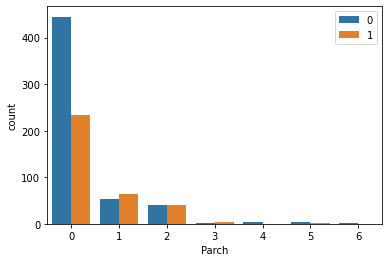

In [15]:
sns.countplot(data=df, x='Parch',hue='Survived')
plt.legend(loc=1)

In [16]:
#dealing with outliers:
df.corr()['Survived'].sort_values()

Pclass     -0.338481
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64

In [17]:
df[df['Fare']>500]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
258,1,1,female,35.0,0,0,512.3292,C
679,1,1,male,36.0,0,1,512.3292,C
737,1,1,male,35.0,0,0,512.3292,C


In [18]:
df.iloc[[258,679,737],6]=df[df['Pclass']==1]['Fare'].mean()

In [19]:
df[df['Fare']>500]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [20]:
df.corr()['Survived'].sort_values()

Pclass     -0.338481
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.265836
Survived    1.000000
Name: Survived, dtype: float64

In [21]:
#dealing with missing data:
df.isnull().sum().sort_values()

Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
Embarked      2
Age         177
dtype: int64

In [22]:
def missing_percent(df):
    nan_percent= 100*(df.isnull().sum()/len(df))
    nan_percent= nan_percent[nan_percent>0].sort_values()
    return nan_percent

In [23]:
nan_percent= missing_percent(df)
nan_percent

Embarked     0.224467
Age         19.865320
dtype: float64

<AxesSubplot:>

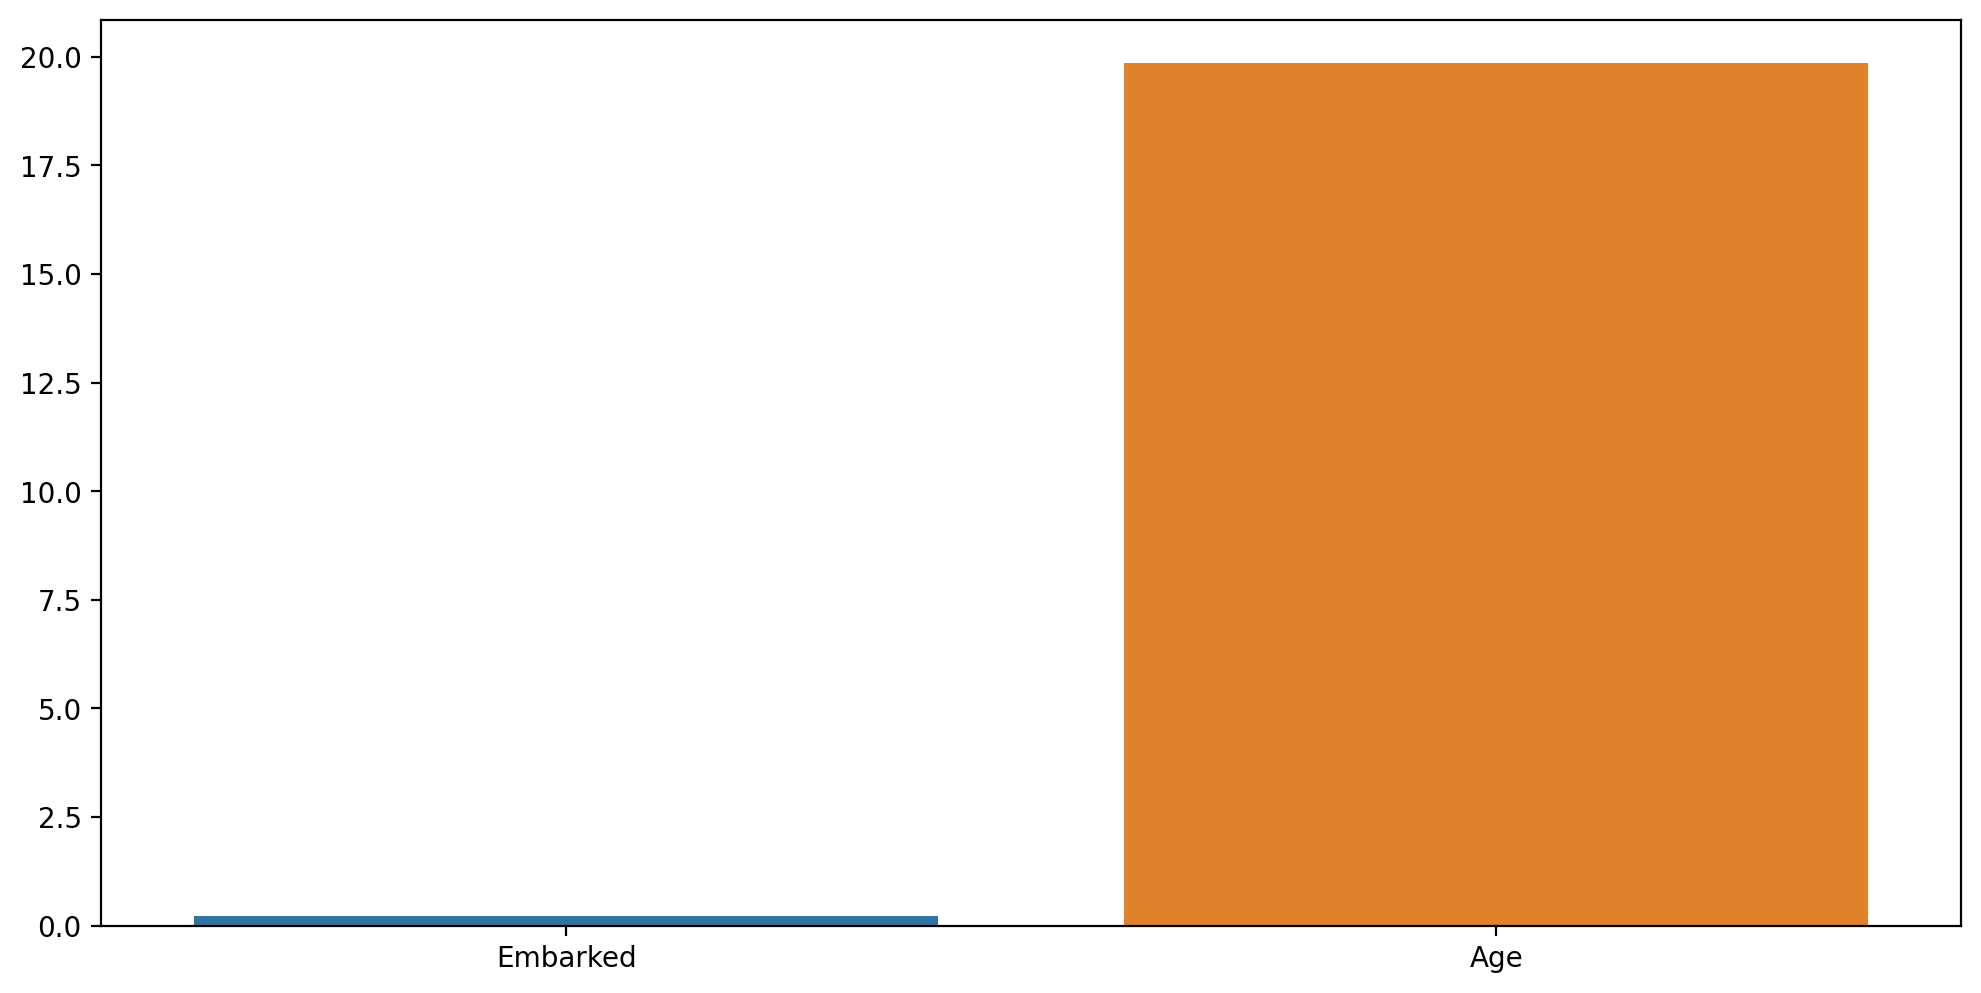

In [24]:
plt.figure(figsize=(12,6),dpi=200)
sns.barplot(x=nan_percent.index,y=nan_percent)

In [25]:
100/len(df)

0.1122334455667789

In [26]:
df[df['Embarked'].isnull()]['Embarked']

61     NaN
829    NaN
Name: Embarked, dtype: object

In [27]:
df.iloc[[61,829]]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [28]:
df=df.dropna(axis=0, subset=['Embarked'])

/Users/juge/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


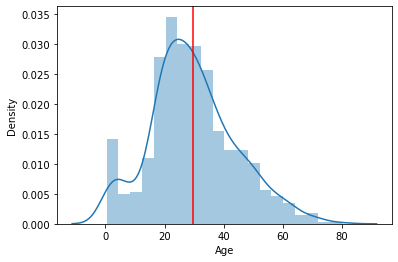

In [29]:
sns.distplot(df['Age'])
plt.axvline(x=(df['Age'].mean()),color='r')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

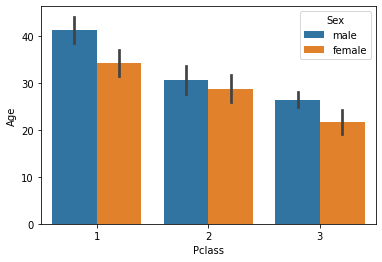

In [30]:
sns.barplot(data=df,x='Pclass',y='Age',hue='Sex')

In [31]:
df.groupby(['Sex', 'Pclass'])['Age'].mean()

Sex     Pclass
female  1         34.240964
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [32]:
#mean the missing values

In [33]:
df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.mean()))

<ipython-input-33-5c1f72a4b802>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.mean()))


In [34]:
nan_percent= missing_percent(df)
nan_percent

Series([], dtype: float64)

In [35]:
#create some dummies
df.select_dtypes(include='object')

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [36]:
df_num= df.select_dtypes(exclude='object')
df_obj= df.select_dtypes(include='object')

In [37]:
# Converting:
df_obj= pd.get_dummies(df_obj, drop_first=True)

In [38]:
final_df= pd.concat([df_num, df_obj], axis=1)
final_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


<AxesSubplot:xlabel='Survived', ylabel='count'>

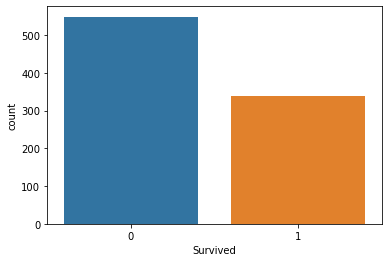

In [42]:
#Beginning of Log Reg
sns.countplot(data=final_df,x='Survived')

In [47]:
X=final_df.drop('Survived',axis=1)
y=final_df['Survived']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)
scaled_X_train= scaler.transform(X_train)
scaled_X_test= scaler.transform(X_test)

In [50]:
from sklearn.linear_model import LogisticRegression
log_model= LogisticRegression()
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [51]:
#Model Coeficient:
log_model.coef_

array([[-1.02699617, -0.57031396, -0.3472521 , -0.07056272, -0.01338802,
        -1.23606791,  0.01909994, -0.14269998]])

In [52]:
y_pred= log_model.predict(scaled_X_test)

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
accuracy_score(y_test, y_pred)

0.8539325842696629

In [54]:
confusion_matrix(y_test, y_pred)

array([[52,  5],
       [ 8, 24]])

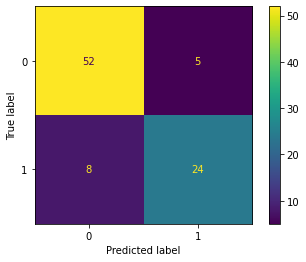

In [55]:
plot_confusion_matrix(log_model, scaled_X_test, y_test)

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        57
           1       0.83      0.75      0.79        32

    accuracy                           0.85        89
   macro avg       0.85      0.83      0.84        89
weighted avg       0.85      0.85      0.85        89



In [57]:
# Evaluating Curves and AUC
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve

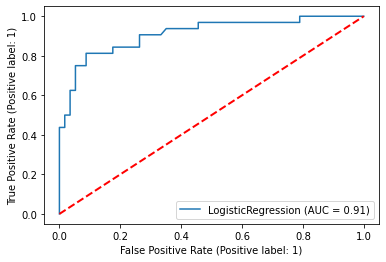

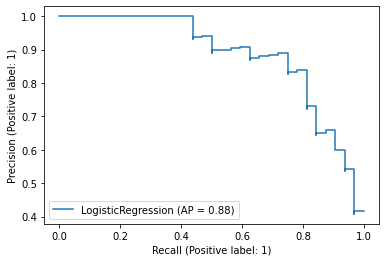

In [59]:
plot_precision_recall_curve(log_model, scaled_X_test, y_test)